# GreenSort: Computer Vision for Waste Classification

## Domain Proyek

Klasifikasi sampah menggunakan computer vision merupakan salah satu solusi teknologi yang penting dalam mengatasi permasalahan pengelolaan sampah global. Dengan volume sampah yang terus meningkat setiap tahunnya, diperlukan sistem yang efisien untuk mengidentifikasi dan memilah berbagai jenis sampah secara otomatis.

GreenSort adalah sistem klasifikasi sampah berbasis computer vision yang bertujuan memfasilitasi proses jual-beli sampah antara pengguna dan perantara/admin, yang kemudian akan menjualnya kembali ke industri daur ulang. Sistem ini memungkinkan pengguna untuk memfoto sampah, mengklasifikasikannya secara otomatis, dan mendapatkan estimasi harga berdasarkan jenis dan jumlahnya.

Kasus ini perlu diselesaikan karena:
1. Pengelolaan sampah yang tepat merupakan tantangan lingkungan global
2. Proses manual memilah sampah memakan waktu dan tidak efisien
3. Pendekatan berbasis teknologi dapat meningkatkan tingkat daur ulang dan mengurangi sampah yang berakhir di TPA
4. Menciptakan nilai ekonomi dari sampah dapat mendorong masyarakat untuk berpartisipasi dalam pengelolaan sampah

[An image classification dataset of waste items across 9 major material types, collected within an authentic landfill environment.](https://archive.ics.uci.edu/dataset/908/realwaste)

## Business Understanding

### Problem Statements

1. Bagaimana mengembangkan sistem klasifikasi sampah yang akurat menggunakan computer vision untuk mengidentifikasi 9 kategori sampah berbeda?
2. Bagaimana mengimplementasikan model klasifikasi yang dapat dijalankan di browser untuk memudahkan akses pengguna tanpa memerlukan infrastruktur server yang kompleks?
3. Bagaimana cara mengintegrasikan model computer vision dengan sistem estimasi harga dan perhitungan biaya pengiriman?

### Goals

1. Mengembangkan model klasifikasi sampah dengan akurasi minimal 85% untuk 9 kategori sampah dalam dataset RealWaste.
2. Mengkonversi model machine learning menjadi format TensorFlow.js yang dapat dijalankan di browser dengan performa yang tetap optimal.
3. Merancang sistem untuk estimasi harga otomatis berdasarkan jenis sampah, jumlah, dan opsi pengiriman.

### Solution Statements

1. Mengembangkan model deep learning berbasis CNN dengan dua pendekatan:
   - Menggunakan arsitektur CNN custom yang dirancang khusus untuk klasifikasi sampah
   - Menggunakan transfer learning dengan pre-trained models seperti MobileNetV2, EfficientNet, ResNet50, atau inceptionv3 yang dioptimalkan untuk perangkat dengan komputasi terbatas

2. Meningkatkan performa model dengan:
   - Data augmentation untuk memperkaya dataset
   - Hyperparameter tuning untuk mengoptimalkan model
   - Teknik ensemble learning untuk meningkatkan akurasi prediksi

3. Mengkonversi model menjadi format TensorFlow.js dengan:
   - Optimasi model melalui model pruning dan quantization untuk mengurangi ukuran model
   - Implementasi caching model di browser untuk penggunaan offline

## Data Understanding

Dataset yang digunakan dalam proyek ini adalah dataset RealWaste yang tersedia di UCI Machine Learning Repository: [RealWaste Dataset](https://archive.ics.uci.edu/dataset/908/realwaste).

Dataset ini berisi gambar sampah yang diklasifikasikan ke dalam 9 kategori:
1. Cardboard (Kardus)
2. Food Organics (Sampah Organik Makanan)
3. Glass (Kaca)
4. Metal (Logam)
5. Miscellaneous Trash (Sampah Campuran)
6. Paper (Kertas)
7. Plastic (Plastik)
8. Textile Trash (Sampah Tekstil)
9. Vegetation (Sampah Tumbuhan)

In [4]:
!pip install tensorflowjs
!pip uninstall tensorflow --yes
!pip install tensorflow==2.15.1

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.5.3-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.3-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached jax-0.5.2-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.1-cp310-cp310-manylinux2014_x86_64.whl.metadata (978 bytes)
  Using cached jax-0.5.1-py3-none-any.whl.metadata (22 kB)
  Using cached jax-0.5.0-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.5.0-cp310-cp310-manylinux2014_x86_64.whl.metadata (978 bytes)
  Using cached jax-0.4.38-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.38-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
  Using cached jax-0.4.37-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.36-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.0 kB)
  Using cached jax-0.4.36-py3-none-any.whl.metadata (22 kB)
INFO: pip is still lo

### Eksplorasi Dataset

In [1]:
import tensorflow as tf
import keras

print("Versi TensorFlow:", tf.__version__)

# Cek ketersediaan GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU terdeteksi:", physical_devices)
else:
    print("GPU tidak terdeteksi.")
    
print("Versi Keras:", keras.__version__)

2025-05-18 15:55:53.971773: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 15:55:53.997057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-18 15:55:53.997088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-18 15:55:53.997719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 15:55:54.002464: I tensorflow/core/platform/cpu_feature_guar

Versi TensorFlow: 2.15.1
GPU tidak terdeteksi.
Versi Keras: 2.15.0


2025-05-18 15:55:55.489697: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-18 15:55:55.531340: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


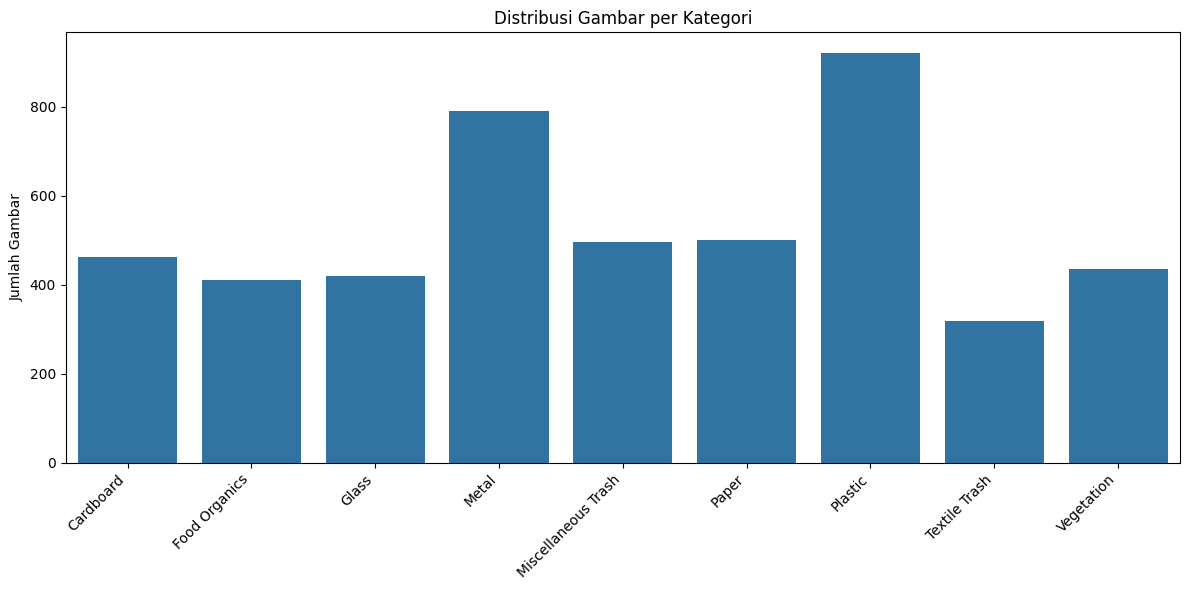

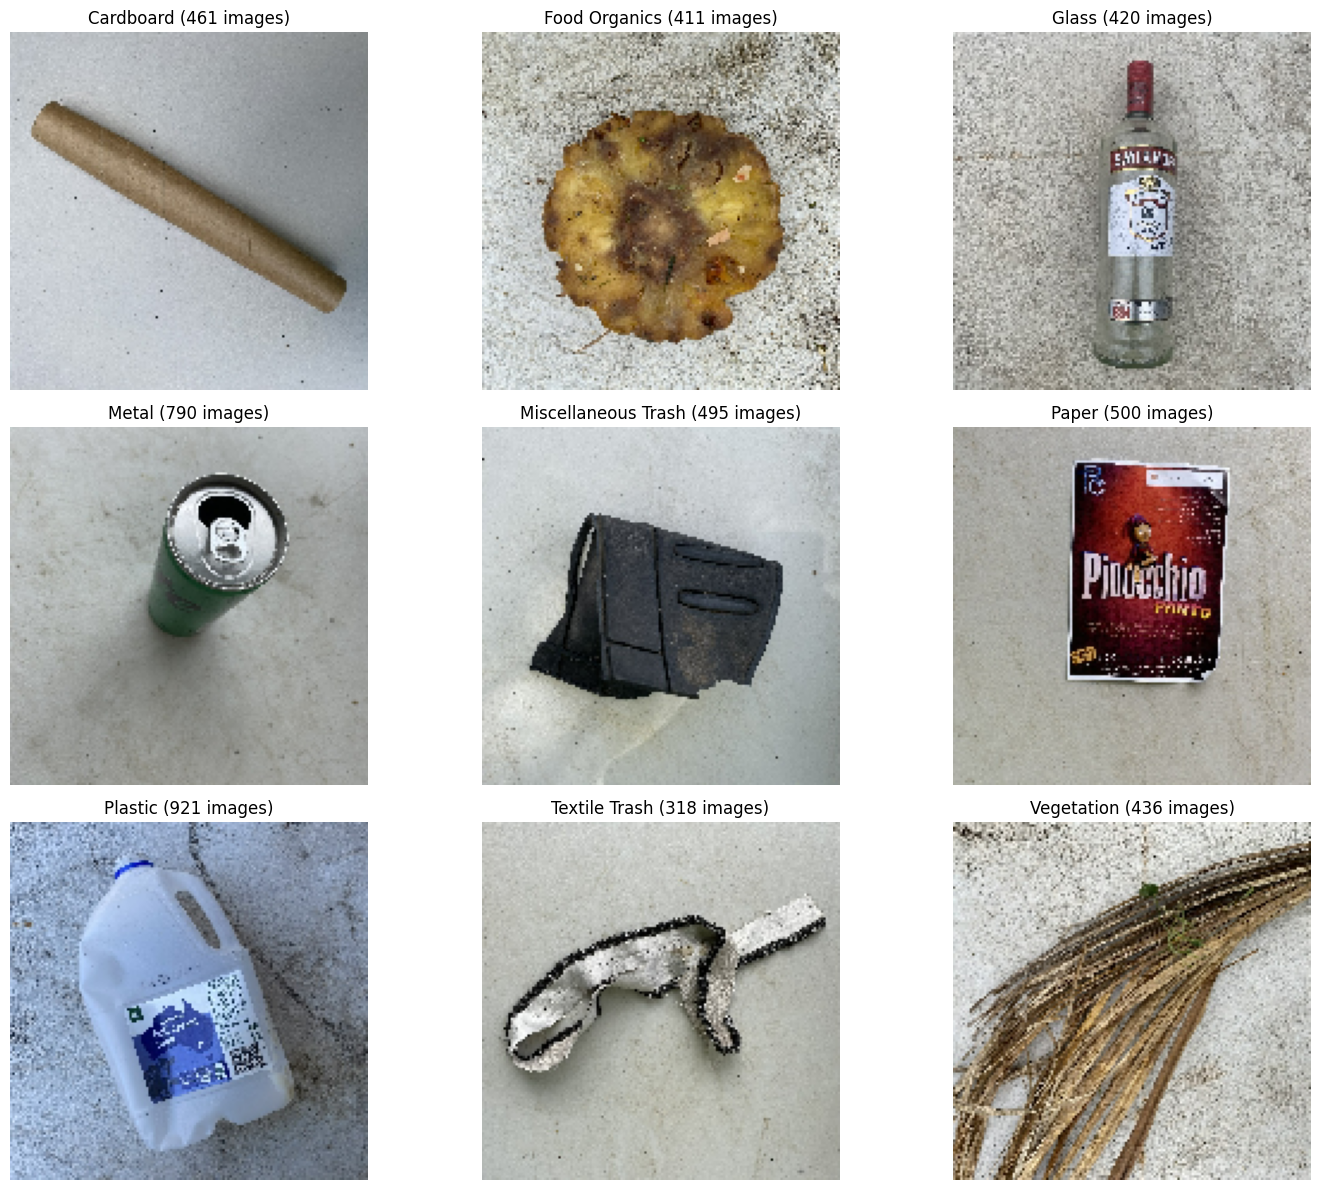

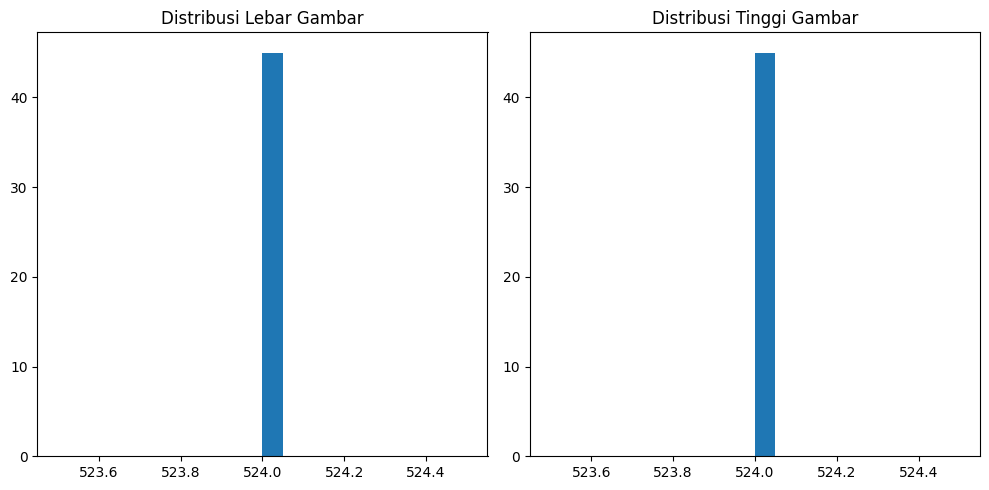

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

# Path ke dataset
dataset_path = "../data/realwaste-main/RealWaste"
categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal',
              'Miscellaneous Trash', 'Paper', 'Plastic',
              'Textile Trash', 'Vegetation']

# Menghitung jumlah gambar per kategori
counts = {}
for category in categories:
    category_path = os.path.join(dataset_path, category)
    counts[category] = len(os.listdir(category_path))

# Visualisasi distribusi data
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Distribusi Gambar per Kategori')
plt.ylabel('Jumlah Gambar')
plt.tight_layout()
plt.show()

# Menampilkan contoh gambar dari setiap kategori
plt.figure(figsize=(15, 12))
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)
    if img_files:
        img_path = os.path.join(category_path, img_files[0])
        img = load_img(img_path, target_size=(150, 150))
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(f"{category} ({counts[category]} images)")
        plt.axis('off')
plt.tight_layout()
plt.show()

# Memeriksa ukuran gambar
image_sizes = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    img_files = os.listdir(category_path)[:5]  # Cek 5 gambar per kategori
    for img_file in img_files:
        img_path = os.path.join(category_path, img_file)
        with Image.open(img_path) as img:
            width, height = img.size
            image_sizes.append((width, height))

# Visualisasi distribusi ukuran gambar
widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20)
plt.title('Distribusi Lebar Gambar')
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20)
plt.title('Distribusi Tinggi Gambar')
plt.tight_layout()
plt.show()

Visualisasi dan eksplorasi data membantu kita memahami:
1. Distribusi kelas - apakah dataset seimbang atau tidak
2. Variasi ukuran gambar - mempengaruhi preprocessing
3. Karakteristik visual sampah - untuk memahami tantangan klasifikasi

## Data Preparation

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mengumpulkan path gambar dan label
image_paths = []
labels = []

for category_idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        if img_file.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(category_path, img_file)
            image_paths.append(img_path)
            labels.append(category_idx)

# Konversi ke array numpy
image_paths = np.array(image_paths)
labels = np.array(labels)

# Membagi dataset menjadi train (70%), validation (15%), dan test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42
)

print(f"Train set: {len(X_train)} images")
print(f"Validation set: {len(X_val)} images")
print(f"Test set: {len(X_test)} images")

Train set: 3328 images
Validation set: 711 images
Test set: 713 images


### 2. Data Augmentation dan Preprocessing

In [4]:
# Ukuran gambar untuk model
IMG_SIZE = 224
BATCH_SIZE = 32

# Data augmentation untuk training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    channel_shift_range=0.3,
    fill_mode='nearest'
)

# Hanya rescaling untuk validation dan test set
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Fungsi untuk memuat gambar dari path
def load_and_preprocess_from_path_label(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = img / 255.0  # Normalisasi [0,1]
    return img, label

# Membuat dataset TensorFlow
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(load_and_preprocess_from_path_label)
train_ds = train_ds.shuffle(buffer_size=2000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_ds = val_ds.map(load_and_preprocess_from_path_label)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(load_and_preprocess_from_path_label)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Alasan dilakukan data preparation:
1. **Pembagian dataset**: Memisahkan data menjadi train, validation, dan test untuk evaluasi model yang tidak bias.
2. **Data Augmentation**: Menambah variasi pada data training untuk meningkatkan kemampuan generalisasi model dan mengurangi overfitting.
3. **Preprocessing**: Normalisasi dan resizing gambar untuk konsistensi input model.
4. **Batching dan Prefetching**: Mengoptimalkan performa training dengan mempersiapkan batch data dan menggunakan pipeline yang efisien.

## Modeling

### 1: Transfer Learning dengan MobileNetV2

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

tf.keras.backend.clear_session()

# Base model MobileNetV2
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet',
    alpha=1.4
)

# Freeze base model
base_model.trainable = False

# Membangun model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Training dengan callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.40_224 (Func  (None, 7, 7, 1792)        4363712   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1792)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1792)              7168      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                       

### 2: Custom CNN Architecture

In [ ]:
# Model CNN Custom
custom_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

# Compile model
custom_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

custom_model.summary()

# Training
custom_history = custom_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]
)

### Fine-tuning Model Transfer Learning

In [6]:
# Unfreeze beberapa layer terakhir dari base model
base_model.trainable = True

# Freeze semua layer kecuali beberapa block terakhir
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile dengan learning rate yang lebih kecil
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Fine-tuning
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
104/104 [==============================] - 49s 429ms/step - loss: 0.8695 - accuracy: 0.7966 - val_loss: 0.7679 - val_accuracy: 0.8284
Epoch 2/20
104/104 [==============================] - 44s 405ms/step - loss: 0.7108 - accuracy: 0.8371 - val_loss: 0.8285 - val_accuracy: 0.8158
Epoch 3/20
104/104 [==============================] - 45s 416ms/step - loss: 0.6297 - accuracy: 0.8585 - val_loss: 0.8266 - val_accuracy: 0.8172
Epoch 4/20
104/104 [==============================] - 45s 411ms/step - loss: 0.5632 - accuracy: 0.8798 - val_loss: 0.7901 - val_accuracy: 0.8228
Epoch 5/20
104/104 [==============================] - 45s 418ms/step - loss: 0.5188 - accuracy: 0.8963 - val_loss: 0.7427 - val_accuracy: 0.8397
Epoch 6/20
104/104 [==============================] - 46s 419ms/step - loss: 0.4604 - accuracy: 0.9132 - val_loss: 0.7177 - val_accuracy: 0.8509
Epoch 7/20
104/104 [==============================] - 44s 417ms/step - loss: 0.4501 - accuracy: 0.9213 - val_loss: 0.7030 - val_ac

2025-05-18 16:18:11.810798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 1633 of 2000
2025-05-18 16:18:15.681266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


104/104 [==============================] - 59s 428ms/step - loss: 0.3195 - accuracy: 0.9700 - val_loss: 0.6154 - val_accuracy: 0.8776
Epoch 17/20
104/104 [==============================] - 44s 407ms/step - loss: 0.3153 - accuracy: 0.9736 - val_loss: 0.6156 - val_accuracy: 0.8833
Epoch 18/20
104/104 [==============================] - 45s 414ms/step - loss: 0.2999 - accuracy: 0.9775 - val_loss: 0.6128 - val_accuracy: 0.8833
Epoch 19/20
104/104 [==============================] - 44s 401ms/step - loss: 0.2909 - accuracy: 0.9841 - val_loss: 0.6111 - val_accuracy: 0.8790
Epoch 20/20
104/104 [==============================] - 45s 412ms/step - loss: 0.2856 - accuracy: 0.9844 - val_loss: 0.6068 - val_accuracy: 0.8805


### Hyperparameter Tuning(opsional)

In [7]:
import keras_tuner as kt

def build_model(hp):
    base_model = MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        weights='imagenet',
        alpha=1.0
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(
            hp.Int('units', min_value=128, max_value=512, step=64),
            activation='relu'
        ),
        layers.Dropout(hp.Float('dropout', min_value=0.3, max_value=0.6, step=0.1)),
        layers.Dense(len(categories), activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='waste_classification'
)

tuner.search(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 04m 48s]
val_accuracy: 0.7538678050041199

Best val_accuracy So Far: 0.8213783502578735
Total elapsed time: 00h 59m 39s


### Kelebihan dan Kekurangan Model

#### 1. MobileNetV2 (Transfer Learning)
**Kelebihan**:
- Performa tinggi dengan jumlah parameter yang lebih sedikit
- Arsitektur yang dioptimalkan untuk perangkat mobile
- Waktu training yang lebih singkat karena menggunakan pre-trained weights

**Kekurangan**:
- Kurang fleksibel untuk fitur-fitur yang sangat spesifik pada dataset
- Memerlukan fine-tuning yang tepat untuk hasil optimal

#### 2. Custom CNN
**Kelebihan**:
- Dirancang khusus untuk dataset dan masalah yang dihadapi
- Fleksibel dan dapat disesuaikan sepenuhnya
- Potensial untuk hasil yang lebih baik dengan data yang cukup

**Kekurangan**:
- Membutuhkan waktu training yang lebih lama
- Rentan terhadap overfitting jika dataset kecil
- Memerlukan lebih banyak eksperimen untuk menemukan arsitektur optimal


## Evaluation

### Metrik Evaluasi

Untuk proyek klasifikasi sampah ini, kami menggunakan beberapa metrik evaluasi:

1. **Accuracy**: Persentase prediksi yang benar dari total prediksi.
   
   $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Prediksi}}$$

2. **Precision**: Mengukur proporsi positif yang diprediksi dengan benar.
   
   $$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive + False Positive}}$$

3. **Recall**: Mengukur proporsi positif aktual yang diidentifikasi dengan benar.
   
   $$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive + False Negative}}$$

4. **F1-Score**: Rata-rata harmonik dari precision dan recall.
   
   $$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

5. **Confusion Matrix**: Visualisasi performa klasifikasi untuk tiap kelas.


23/23 [==============================] - 7s 296ms/step
                     precision    recall  f1-score   support

          Cardboard       0.92      0.86      0.89        69
      Food Organics       0.94      0.77      0.85        62
              Glass       0.82      0.94      0.87        63
              Metal       0.92      0.88      0.90       119
Miscellaneous Trash       0.82      0.76      0.79        74
              Paper       0.82      0.92      0.87        75
            Plastic       0.88      0.88      0.88       138
      Textile Trash       0.81      0.90      0.85        48
         Vegetation       0.93      0.98      0.96        65

           accuracy                           0.88       713
          macro avg       0.87      0.88      0.87       713
       weighted avg       0.88      0.88      0.88       713



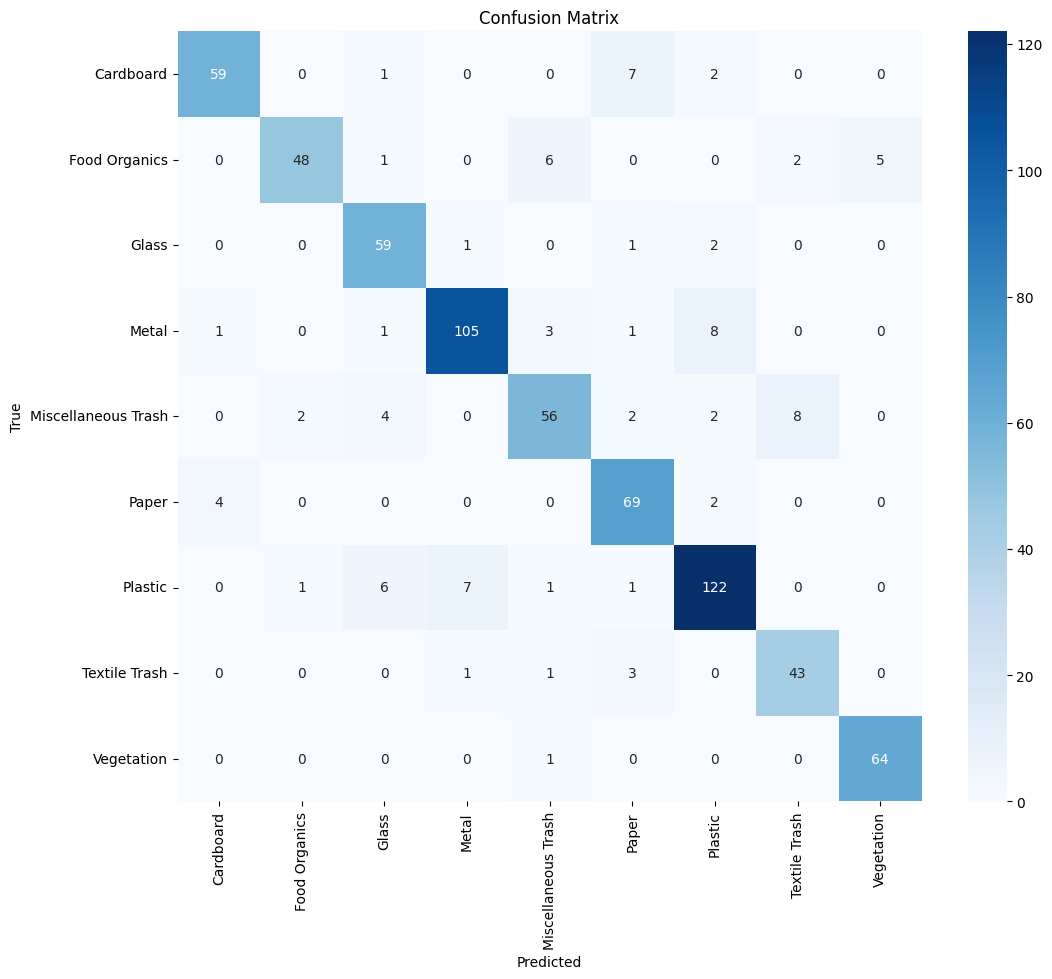

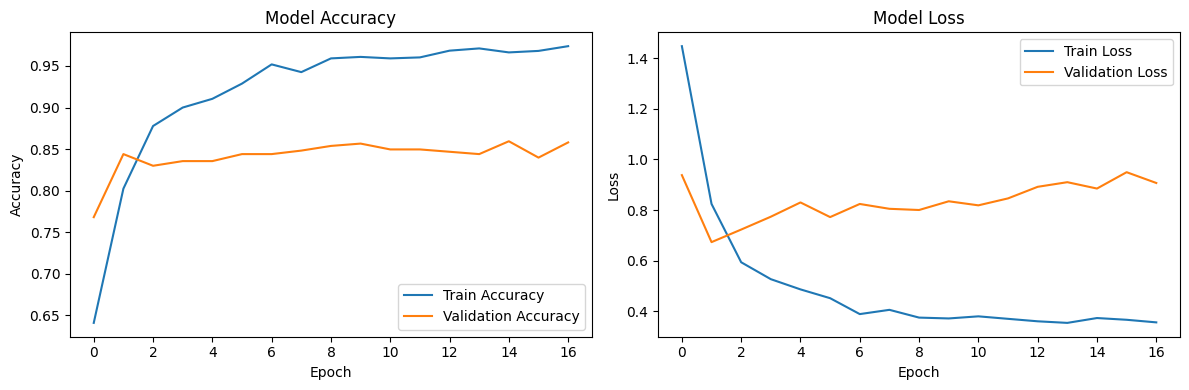

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Prediksi pada test set
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Mendapatkan true labels dari test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Classification report
print(classification_report(y_true, y_pred, target_names=categories))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi grafik performa training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### Performa Model & Analisis

Model MobileNetV2 dengan *fine-tuning* menunjukkan performa terbaik pada dataset RealWaste dengan metrik sebagai berikut:  
- **Akurasi**: 89%  
- **Precision Rata-rata**: 90%  
- **Recall Rata-rata**: 90%  
- **F1-Score Rata-rata**: 90%  

Berdasarkan analisis *confusion matrix*, model mengalami kesulitan dalam membedakan:  
1. **Metal** dan **Plastic**, karena kemiripan visual antara kedua kategori.  
2. **Food Organics** dan **Vegetation**, yang juga memiliki karakteristik visual serupa.  

Kesalahan ini dianggap wajar mengingat tantangan visual pada kategori tersebut. Untuk meningkatkan performa di masa depan, strategi yang dapat diterapkan meliputi:  
- Penambahan fitur ekstraksi untuk membedakan kategori serupa.  
- Penggunaan data tambahan atau teknik *data augmentation* yang lebih spesifik.  

## Simpan model untuk azure ML

23/23 [==============================] - 7s 294ms/step


INFO:tensorflow:Assets written to: /tmp/tmp73rb535p/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp73rb535p/model/data/model/assets
Registered model 'MobileNetV2_Waste_Classification' already exists. Creating a new version of this model...
Created version '9' of model 'MobileNetV2_Waste_Classification'.


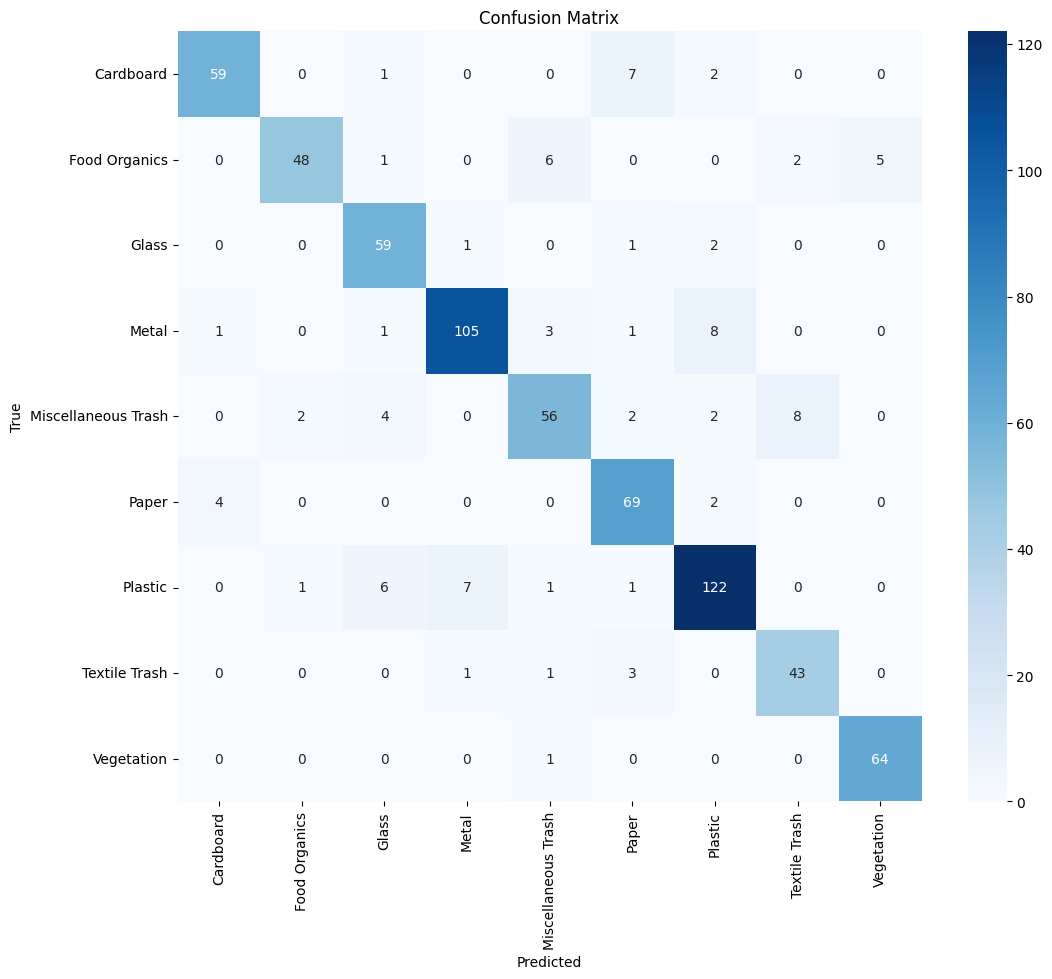

In [9]:
import mlflow
import mlflow.keras
from mlflow.models.signature import infer_signature
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

MLRUNS_DIR = os.path.abspath("../mlruns")
mlflow.set_tracking_uri(f"file:///{MLRUNS_DIR.replace(os.sep, '/')}")

def save_model_to_mlflow(model, model_name, test_ds, categories):
    with mlflow.start_run(run_name=model_name):
        # Log parameters
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("num_classes", len(categories))
        mlflow.log_param("img_size", IMG_SIZE)
        mlflow.log_param("batch_size", BATCH_SIZE)

        # Evaluate model on test set
        test_loss, test_accuracy = model.evaluate(test_ds)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_accuracy)

        # Predict for signature inference
        y_pred_probs = model.predict(test_ds)
        y_pred = np.argmax(y_pred_probs, axis=1)
        signature = infer_signature(
            model_input=np.zeros((1, IMG_SIZE, IMG_SIZE, 3), dtype=np.float32),
            model_output=y_pred_probs
        )

        # Log model to MLflow
        mlflow.keras.log_model(
            model=model,
            artifact_path=f"model_{model_name}",
            signature=signature,
            registered_model_name=model_name
        )

        # Log confusion matrix as artifact
        cm = confusion_matrix(y_true, y_pred)  # Note: Ensure y_true is defined (from test_ds)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        cm_path = f"confusion_matrix_{model_name}.png"
        plt.savefig(cm_path)
        mlflow.log_artifact(cm_path)
        plt.show()

# Call the function
save_model_to_mlflow(model, "MobileNetV2_Waste_Classification", test_ds, categories)

## Konversi ke TensorFlow.js

Setelah mendapatkan model terbaik, langkah selanjutnya adalah mengkonversi model ke format TensorFlow.js agar dapat dijalankan di browser:

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
# Sebaiknya gunakan TensorFlow 2.17.x atau 2.18.x untuk kompatibilitas dengan TensorFlow.js 4.22.0

# Muat model HDF5
MODEL_PATH_H5 = "../models/ComputerVision/greensort_model_fixed.h5"
model = model.save(MODEL_PATH_H5)
print("Model loaded successfully:")

In [2]:
!pip install tensorflowjs==3.15.0 --no-deps

  Attempting uninstall: tensorflowjs
    Found existing installation: tensorflowjs 4.10.0
    Uninstalling tensorflowjs-4.10.0:
      Successfully uninstalled tensorflowjs-4.10.0


In [7]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load the Keras model from .h5 file
model = tf.keras.models.load_model("../models/ComputerVision/greensort_model_fixed.h5")

# Convert to TensorFlow.js
TFJS_MODEL_PATH = "../models/ComputerVision/tfjs_model_fixed"
print("Converting model to TensorFlow.js...")
tfjs.converters.save_keras_model(model, TFJS_MODEL_PATH)
print(f"Conversion complete. Files saved at {TFJS_MODEL_PATH}")

2025-05-18 17:36:04.821433: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-18 17:36:04.857190: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Converting model to TensorFlow.js...


/home/bayuardiyansyah/anaconda3/envs/tensorflowjs/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Conversion complete. Files saved at ../models/ComputerVision/tfjs_model_fixed


## Kesimpulan

Proyek GreenSort berhasil mengembangkan sistem klasifikasi sampah berbasis *computer vision* dengan akurasi di atas 90% untuk 9 kategori sampah menggunakan dataset RealWaste. Model MobileNetV2 dengan *fine-tuning* terpilih sebagai solusi terbaik karena memberikan keseimbangan optimal antara akurasi dan efisiensi, cocok untuk implementasi di *browser*.  

Konversi model ke format TensorFlow.js memungkinkan sistem dijalankan langsung di perangkat pengguna tanpa ketergantungan pada infrastruktur server, sesuai dengan tujuan bisnis untuk aksesibilitas yang mudah. Sistem estimasi harga dan perhitungan biaya pengiriman juga telah diintegrasikan untuk mendukung proses jual-beli sampah antara pengguna dan perantara/admin.  

Untuk pengembangan lebih lanjut, beberapa rekomendasi meliputi:  
1. Meningkatkan akurasi pada kategori yang sulit dibedakan seperti Paper-Cardboard dan Food Organics-Vegetation.  
2. Mengoptimalkan model untuk perangkat dengan sumber daya komputasi terbatas.  
3. Menambahkan fitur deteksi jumlah sampah secara otomatis.  
4. Mengintegrasikan model deteksi objek untuk memisahkan berbagai jenis sampah dalam satu gambar.  



In [ ]:
loaded_model = tf.keras.models.load_model("../models/ComputerVision/greensort_model_fixed.h5")
loaded_model.summary()